In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv("BAJFINANCE.csv",sep=",")

In [32]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']


In [33]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5113 entries, 2000-01-03 to 2020-10-30
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5113 non-null   datetime64[ns]
 1   Symbol              5113 non-null   object        
 2   Series              5113 non-null   object        
 3   Prev Close          5113 non-null   float64       
 4   Open                5113 non-null   float64       
 5   High                5113 non-null   float64       
 6   Low                 5113 non-null   float64       
 7   Last                5113 non-null   float64       
 8   Close               5113 non-null   float64       
 9   VWAP                5113 non-null   float64       
 10  Volume              5113 non-null   int64         
 11  Turnover            5113 non-null   float64       
 12  Trades              2334 non-null   float64       
 13  Deliverable Volume  4667 non-n

In [35]:
training_set = df.iloc[:, 8:9].values

In [36]:
training_set


array([[  50.75],
       [  48.1 ],
       [  44.6 ],
       ...,
       [3370.8 ],
       [3380.05],
       [3309.  ]])

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [38]:

train = training_set_scaled[:2300,:]

test = training_set_scaled[3000:,:]

In [39]:
x_train = []
y_train = []
timestamp = 60
length = len(train)
for i in range(timestamp, length):
    x_train.append(train[i-timestamp:i, 0])
    y_train.append(train[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)
print (x_train[0])
print ('\n')
print (y_train[0])

[0.00230895 0.00207586 0.001768   0.00182517 0.00161846 0.00161846
 0.00137218 0.00127542 0.0013194  0.00135458 0.00129301 0.00121385
 0.00148652 0.00162726 0.00162286 0.00136778 0.00116107 0.00127542
 0.00124463 0.0011039  0.00101594 0.00116107 0.00111709 0.00118306
 0.00125343 0.00124903 0.00152171 0.00181637 0.00213743 0.00179438
 0.00148213 0.00133699 0.00148652 0.00143375 0.00136338 0.00120505
 0.00138097 0.00159208 0.00142055 0.00143815 0.00120505 0.00135019
 0.00120945 0.0010995  0.00086641 0.00080483 0.00101154 0.00083562
 0.00099835 0.00096316 0.00076085 0.00099395 0.00123144 0.00096316
 0.00098075 0.000884   0.00092358 0.000884   0.00094557 0.00091039]


0.0009279783266483706


In [40]:
x_train.shape

(2240, 60)

In [41]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2240, 60, 1)

In [43]:
x_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units = 92, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [54]:
history = model.fit(x_train, y_train, epochs = 25, batch_size = 32,validation_data=(X_val, y_val))

Train on 1792 samples, validate on 448 samples
Epoch 1/25
1792/1792 [==============================] - 23s 13ms/step - loss: 6.9099e-05 - mean_squared_error: 6.9099e-05 - val_loss: 8.6604e-06 - val_mean_squared_error: 8.6604e-06
Epoch 2/25
1792/1792 [==============================] - 19s 11ms/step - loss: 9.8212e-06 - mean_squared_error: 9.8212e-06 - val_loss: 6.7308e-06 - val_mean_squared_error: 6.7308e-06
Epoch 3/25
1792/1792 [==============================] - 19s 11ms/step - loss: 8.9901e-06 - mean_squared_error: 8.9901e-06 - val_loss: 6.9104e-06 - val_mean_squared_error: 6.9104e-06
Epoch 4/25
1792/1792 [==============================] - 19s 11ms/step - loss: 1.1027e-05 - mean_squared_error: 1.1027e-05 - val_loss: 3.9240e-06 - val_mean_squared_error: 3.9240e-06
Epoch 5/25
1792/1792 [==============================] - 19s 11ms/step - loss: 7.4953e-06 - mean_squared_error: 7.4953e-06 - val_loss: 3.7466e-06 - val_mean_squared_error: 3.7466e-06
Epoch 6/25
1792/1792 [=====================

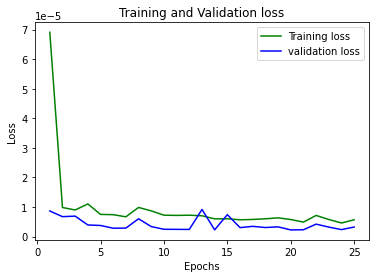

In [55]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 92)            34592     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 92)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 92)            68080     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 92)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 92)            68080     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 92)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 92)               

In [21]:
y_test = test[60:,:]

In [22]:
x_test = [] 
length = len(test)

for i in range(timestamp, length):
    x_test.append(test[i-timestamp:i, 0])
    
x_test = np.array(x_test)
x_test.shape

(2053, 60)

In [23]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(2053, 60, 1)

In [24]:
y_pred = model.predict(x_test)
predicted_price = sc.inverse_transform(y_pred)
y_test  = sc.inverse_transform(y_test)


In [25]:
predicted_price.shape

(2053, 1)

In [26]:
predicted_price=predicted_price[0:800,:]
y_test = y_test[0:800,:]

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predicted_price)

32367.028186883963

In [28]:
rms=np.sqrt(np.mean(np.power((y_test-predicted_price),2)))
rms

179.90838831717647

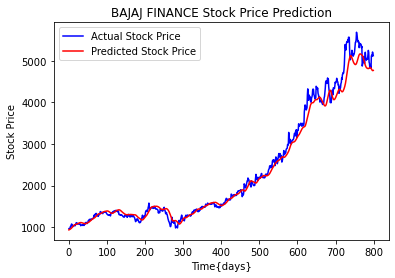

In [29]:
plt.title('LSTM Model prediction of bajaj finance trading')
#plt.plot(y_train,color='green')
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('BAJAJ FINANCE Stock Price Prediction')
plt.xlabel('Time{days}')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
